In [102]:
library(tidyverse)
library(magrittr)
library(purrr) 
library(glue) 
library(stringr) 

library(rvest) 
library(polite)
library(xml2) 

In [103]:
all_region_fire_incident <- read_html('https://www.fireandemergency.nz/incidents-and-news/incident-reports/')

In [104]:
north_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(6) .region .region__link') %>%
   html_attr('href') 
north_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday"  
[2] "/incidents-and-news/incident-reports/incidents?region=1&day=Monday"   
[3] "/incidents-and-news/incident-reports/incidents?region=1&day=Sunday"   
[4] "/incidents-and-news/incident-reports/incidents?region=1&day=Saturday" 
[5] "/incidents-and-news/incident-reports/incidents?region=1&day=Friday"   
[6] "/incidents-and-news/incident-reports/incidents?region=1&day=Thursday" 
[7] "/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday"

In [105]:
central_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(7) .region .region__link') %>%
   html_attr('href') 
central_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday"  
[2] "/incidents-and-news/incident-reports/incidents?region=2&day=Monday"   
[3] "/incidents-and-news/incident-reports/incidents?region=2&day=Sunday"   
[4] "/incidents-and-news/incident-reports/incidents?region=2&day=Saturday" 
[5] "/incidents-and-news/incident-reports/incidents?region=2&day=Friday"   
[6] "/incidents-and-news/incident-reports/incidents?region=2&day=Thursday" 
[7] "/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday"

In [106]:
south_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(8) .region .region__link') %>%
   html_attr('href') 
south_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday"  
[2] "/incidents-and-news/incident-reports/incidents?region=3&day=Monday"   
[3] "/incidents-and-news/incident-reports/incidents?region=3&day=Sunday"   
[4] "/incidents-and-news/incident-reports/incidents?region=3&day=Saturday" 
[5] "/incidents-and-news/incident-reports/incidents?region=3&day=Friday"   
[6] "/incidents-and-news/incident-reports/incidents?region=3&day=Thursday" 
[7] "/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday"

In [107]:
all_region_href <- tibble(North = north_region_href, Central = central_region_href, South = south_region_href)
all_region_href

North,Central,South
<chr>,<chr>,<chr>
/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday
/incidents-and-news/incident-reports/incidents?region=1&day=Monday,/incidents-and-news/incident-reports/incidents?region=2&day=Monday,/incidents-and-news/incident-reports/incidents?region=3&day=Monday
/incidents-and-news/incident-reports/incidents?region=1&day=Sunday,/incidents-and-news/incident-reports/incidents?region=2&day=Sunday,/incidents-and-news/incident-reports/incidents?region=3&day=Sunday
/incidents-and-news/incident-reports/incidents?region=1&day=Saturday,/incidents-and-news/incident-reports/incidents?region=2&day=Saturday,/incidents-and-news/incident-reports/incidents?region=3&day=Saturday
/incidents-and-news/incident-reports/incidents?region=1&day=Friday,/incidents-and-news/incident-reports/incidents?region=2&day=Friday,/incidents-and-news/incident-reports/incidents?region=3&day=Friday
/incidents-and-news/incident-reports/incidents?region=1&day=Thursday,/incidents-and-news/incident-reports/incidents?region=2&day=Thursday,/incidents-and-news/incident-reports/incidents?region=3&day=Thursday
/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday


In [108]:
install.packages('xts')
library(xts)

Installing package into ‘/home/christopher/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [109]:
region_incident_data <- function(href){
    
    region_data <- glue('https://www.fireandemergency.nz{href}#')%>%
                   read_html() %>%
                   html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                   html_text2()

    region_round_time <- strptime(region_data, "%d/%m/%Y %H:%M:%S")

    for(i in 1:length(region_round_time)){
        region_round_time[i] <- align.time(region_round_time[i], n=60*30
        )

    }
    
    return(region_round_time)
    
    }
    result <- region_incident_data("/incidents-and-news/incident-reports/incidents?region=1&day=Monday#")
    result
                  

  [1] "2022-10-17 00:30:00 NZDT" "2022-10-17 01:00:00 NZDT"
  [3] "2022-10-17 01:30:00 NZDT" "2022-10-17 01:30:00 NZDT"
  [5] "2022-10-17 01:30:00 NZDT" "2022-10-17 03:00:00 NZDT"
  [7] "2022-10-17 04:00:00 NZDT" "2022-10-17 04:30:00 NZDT"
  [9] "2022-10-17 05:30:00 NZDT" "2022-10-17 06:00:00 NZDT"
 [11] "2022-10-17 06:00:00 NZDT" "2022-10-17 06:30:00 NZDT"
 [13] "2022-10-17 06:30:00 NZDT" "2022-10-17 07:00:00 NZDT"
 [15] "2022-10-17 07:30:00 NZDT" "2022-10-17 08:00:00 NZDT"
 [17] "2022-10-17 08:00:00 NZDT" "2022-10-17 08:30:00 NZDT"
 [19] "2022-10-17 08:30:00 NZDT" "2022-10-17 09:00:00 NZDT"
 [21] "2022-10-17 09:00:00 NZDT" "2022-10-17 10:00:00 NZDT"
 [23] "2022-10-17 10:30:00 NZDT" "2022-10-17 10:30:00 NZDT"
 [25] "2022-10-17 10:30:00 NZDT" "2022-10-17 10:30:00 NZDT"
 [27] "2022-10-17 11:00:00 NZDT" "2022-10-17 11:00:00 NZDT"
 [29] "2022-10-17 11:00:00 NZDT" "2022-10-17 11:30:00 NZDT"
 [31] "2022-10-17 11:30:00 NZDT" "2022-10-17 12:00:00 NZDT"
 [33] "2022-10-17 12:00:00 NZDT" "2022-1

In [110]:
# this function return a data frame/tibble which contains all the data scraped from the fire incidents reports data
# this function takes id( characters indicating the region id; 1 being North, 2 being Central and 3 being South) and the day(string indicating the day of interest; e.g. Monday, Tuesday, etc)
region_incident_data <- function(id, day){
    
    region_href <- glue('https://www.fireandemergency.nz/incidents-and-news/incident-reports/incidents?region={id}&day={day}#')%>%
                   read_html() # first here we prepare the url which is the url for the page we want to scrape, then use read_html() function we scrape the data from the webpage and store the data in a variable
    # then from the scraped data which is the result from above code, we tried to categories the data we get and put the data in each category to their own varibale(performed below).


    Incident <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(1) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()# so here we tried to get the data which tell us about incident number from the scrapped data and store it to variable
    
    Date_and_Time <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about date and time from the scrapped data and store it to variable

    Date_and_Time <- strptime(Date_and_Time, "%d/%m/%Y %H:%M:%S") #Date and time requires special treatment in our case, since we would like to runf the time to the nearest 30 minute, we have to change the data type from char to dttm(date and time). strptime() function allows us to do that

    # then here we tried to format it to nearest 30 minutes, we do it by looping through the date and time column
    for(i in 1:length(Date_and_Time)){
        Date_and_Time[i] <- align.time(Date_and_Time[i], n=60*30 # then by using align.time() function we make the time to nearest 30 minutes
        )

    }
    

    Location <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(3) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about location from the scrapped data and store it to variable
    
    Duration <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(4) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about duration from the scrapped data and store it to variable
    
    Station <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(5) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about fire station from the scrapped data and store it to variable
    
    Result <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(6) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about result(which has result description and result code) from the scrapped data and store it to variable
    
    # then a new tibble is created which consist all data we get from code above in different columns
    region_incident_table <- tibble(Incident_no = Incident, Date_and_Time = Date_and_Time, Location = Location, Duration = Duration, Station = Station, Result = Result)
    
    return(region_incident_table)
    
    }

format:
{region}_{day}_data

## Merge all dataframe from Monday to Sunday into sngle one data frame

In [111]:
# this function return a tibble which consist of all fire incidents report in a certain region from one week ago from the current date
 # this function take one parameter which is region( a number in form of string which indicates what region we want to get the data from )
get_week_data <- function(region) {
    result_tibble <- tibble( # here we prepare the tibble, this tiblle is now empty but it will later be filled with data of fire incidents report in each day
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday") 
    for(i in temp){
        result_tibble <- rbind(result_tibble, region_incident_data(region, i)) # here we loop through the day vectors which we prepare above, then using the region_incident_data() function we defined in previous section to fetch the fire incidents data for each day, then using rbind() function we can apppend the result_tiblle with each tibble we get from calling the region_incident_data() function
    }
    
    return(result_tibble) 
}

# so let say I want to get the a week data of fire incidents report  in central region
# I can just call the get_week_data() function and specify the parameter to "2"
the_tibble <- get_week_data("2")
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3579641,2022-10-17 00:30:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,
F3579642,2022-10-17 00:30:00,WESTOWN NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,
F3579650,2022-10-17 02:30:00,MANAKAU HOROWHENUA DISTRICT,00:00:00,Otaki,
F3579651,2022-10-17 02:30:00,ROSLYN PALMERSTON NORTH CITY,00:00:00,Milson,
F3579670,2022-10-17 06:30:00,TRENTHAM UPPER HUTT CITY,00:00:00,Trentham,
F3579679,2022-10-17 07:30:00,PETONE LOWER HUTT CITY,00:00:00,Seaview,
F3579695,2022-10-17 08:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,
F3579707,2022-10-17 08:30:00,TWYFORD HASTINGS DISTRICT,00:00:00,Hastings,
F3579710,2022-10-17 08:30:00,FERNHILL HASTINGS DISTRICT,00:00:00,Hastings,


## Seperate date and time columns. Also adding the new column for the day of the week

In [112]:
library(lubridate) # lubridate library have some functions that really useful for use especially when dealing when date and time

In [113]:
the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))# here we created 2 new columns, one for date and one for time. We seperate the date and time so that the data frame look more tidy and presentable for the user. It is also so that we can easily import it to the tableu
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
F3579641,2022-10-17 00:30:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,00:30:00
F3579642,2022-10-17 00:30:00,WESTOWN NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,00:30:00
F3579650,2022-10-17 02:30:00,MANAKAU HOROWHENUA DISTRICT,00:00:00,Otaki,,2022-10-17,02:30:00
F3579651,2022-10-17 02:30:00,ROSLYN PALMERSTON NORTH CITY,00:00:00,Milson,,2022-10-17,02:30:00
F3579670,2022-10-17 06:30:00,TRENTHAM UPPER HUTT CITY,00:00:00,Trentham,,2022-10-17,06:30:00
F3579679,2022-10-17 07:30:00,PETONE LOWER HUTT CITY,00:00:00,Seaview,,2022-10-17,07:30:00
F3579695,2022-10-17 08:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,08:00:00
F3579707,2022-10-17 08:30:00,TWYFORD HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-17,08:30:00
F3579710,2022-10-17 08:30:00,FERNHILL HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-17,08:30:00


## Seperate the result code and the result description into 2 columns

To seperate the result code and the result description, we created 2 new functions. These two functions will be called for each value in the column result and returns either the code or description

In [114]:
# this function return the code which describe the incidents
# this function takes a string which is the raw data of the result
get_result_code <- function(result){
    splitted_result <- strsplit(result, split=":") #first we split the result string by ":"
    result_list <- vector(mode = "list", len = 0) # then we prepare a new empty "list" to store all the codes
    for(i in splitted_result){
        result_list<- append(result_list, i[1]) # then we loop through every result and get the first item in the splitted_result
    }
    return(result_list) # then we return the list which contains all the codes of the incident
}


# this function return the description which describe the incidents
# this function takes a string which is the raw data of the result
get_result_desc <- function(result){
    splitted_result <- strsplit(result, split=":")#first we split the result string by ":"
    desc_list <- vector(mode = "list", len = 0)# then we prepare a new empty "list" to store all the description
    for(i in splitted_result){# then we loop through every item in splitted result
        desc = "" # then we prepare an empty variable which contains later will contains full description
        for(ind in seq_along(i)){
            if(ind != 1) {
                desc <- glue(desc,i[[ind]]) # after that we concantenate all the string after the fisrt index
            }
        }

        desc_list <- append(desc_list, desc) # then each description to the empty list we preared before
    }
    
    return(desc_list)
}

#then we created 2 new columns which will contains the only the result code and the result description with the help of 2 functions we created before
the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% 
                            mutate(Result_Description = get_result_desc(Result)) %>% 
                            mutate(across(Result_Description, as.character)) %>% # also here we make sure that the result description has correct type
                            mutate(Day = wday(Date_and_Time, label = TRUE)) # here we also make new column for the day of the week
the_tibble




Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time,Result_code,Result_Description,Day
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<list>,<chr>,<ord>
F3579641,2022-10-17 00:30:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,00:30:00,NA,,Mon
F3579642,2022-10-17 00:30:00,WESTOWN NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,00:30:00,NA,,Mon
F3579650,2022-10-17 02:30:00,MANAKAU HOROWHENUA DISTRICT,00:00:00,Otaki,,2022-10-17,02:30:00,NA,,Mon
F3579651,2022-10-17 02:30:00,ROSLYN PALMERSTON NORTH CITY,00:00:00,Milson,,2022-10-17,02:30:00,NA,,Mon
F3579670,2022-10-17 06:30:00,TRENTHAM UPPER HUTT CITY,00:00:00,Trentham,,2022-10-17,06:30:00,NA,,Mon
F3579679,2022-10-17 07:30:00,PETONE LOWER HUTT CITY,00:00:00,Seaview,,2022-10-17,07:30:00,NA,,Mon
F3579695,2022-10-17 08:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,08:00:00,NA,,Mon
F3579707,2022-10-17 08:30:00,TWYFORD HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-17,08:30:00,NA,,Mon
F3579710,2022-10-17 08:30:00,FERNHILL HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-17,08:30:00,NA,,Mon


## Tidy up the data

#### dropping unecessary columns

In [115]:
the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description) # here we drop unecessary column
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>
F3579641,Mon,2022-10-17,00:30:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579642,Mon,2022-10-17,00:30:00,00:00:00,WESTOWN NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579650,Mon,2022-10-17,02:30:00,00:00:00,MANAKAU HOROWHENUA DISTRICT,Otaki,NA,
F3579651,Mon,2022-10-17,02:30:00,00:00:00,ROSLYN PALMERSTON NORTH CITY,Milson,NA,
F3579670,Mon,2022-10-17,06:30:00,00:00:00,TRENTHAM UPPER HUTT CITY,Trentham,NA,
F3579679,Mon,2022-10-17,07:30:00,00:00:00,PETONE LOWER HUTT CITY,Seaview,NA,
F3579695,Mon,2022-10-17,08:00:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579707,Mon,2022-10-17,08:30:00,00:00:00,TWYFORD HASTINGS DISTRICT,Hastings,NA,
F3579710,Mon,2022-10-17,08:30:00,00:00:00,FERNHILL HASTINGS DISTRICT,Hastings,NA,


In [116]:
the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer)) %>% mutate(across(Day, as.character)) # here we update the column type of colum result code and day so that they have correct type
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579641,Mon,2022-10-17,00:30:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579642,Mon,2022-10-17,00:30:00,00:00:00,WESTOWN NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579650,Mon,2022-10-17,02:30:00,00:00:00,MANAKAU HOROWHENUA DISTRICT,Otaki,NA,
F3579651,Mon,2022-10-17,02:30:00,00:00:00,ROSLYN PALMERSTON NORTH CITY,Milson,NA,
F3579670,Mon,2022-10-17,06:30:00,00:00:00,TRENTHAM UPPER HUTT CITY,Trentham,NA,
F3579679,Mon,2022-10-17,07:30:00,00:00:00,PETONE LOWER HUTT CITY,Seaview,NA,
F3579695,Mon,2022-10-17,08:00:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579707,Mon,2022-10-17,08:30:00,00:00:00,TWYFORD HASTINGS DISTRICT,Hastings,NA,
F3579710,Mon,2022-10-17,08:30:00,00:00:00,FERNHILL HASTINGS DISTRICT,Hastings,NA,


## Finding out the missing data

In [117]:
library(visdat)

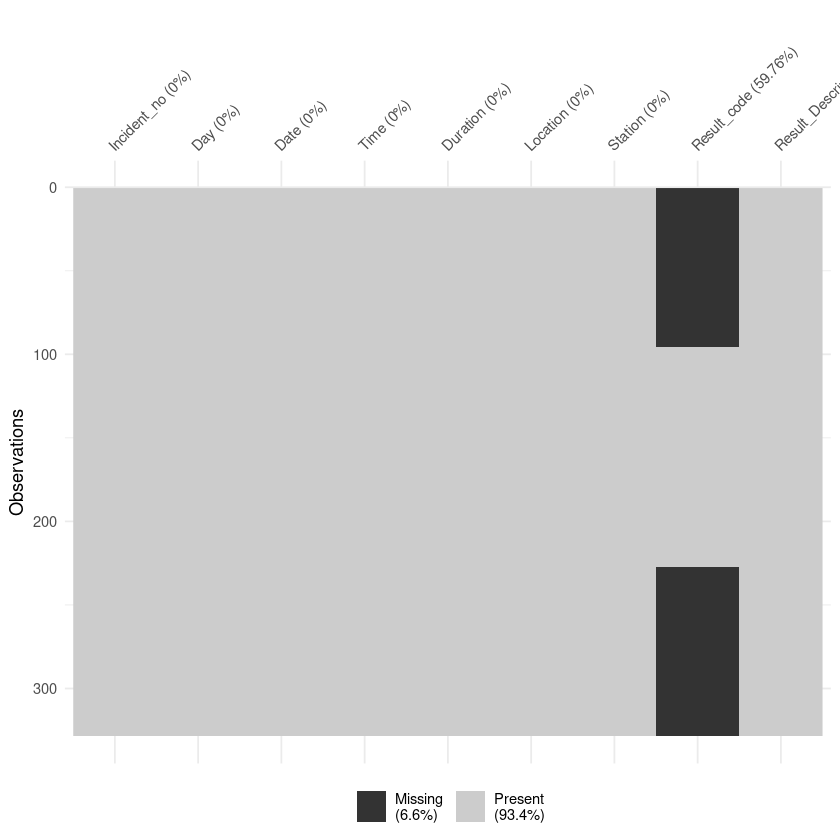

In [118]:
check_tibble <- the_tibble %>% vis_miss() # use vis_miss() function to visualize the observation with missing value
check_tibble

## Make empty string in Result Description to show NA insteas of an empty string

In [119]:
# we decide on keeping the obsevation with missing value, hence we didn't omit those observation with missing values
# here we just make sure that the missing values have value and NA instead of just an empty string
the_tibble <- mutate_all(the_tibble, list(~na_if(.,""))) 
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579641,Mon,2022-10-17,00:30:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579642,Mon,2022-10-17,00:30:00,00:00:00,WESTOWN NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579650,Mon,2022-10-17,02:30:00,00:00:00,MANAKAU HOROWHENUA DISTRICT,Otaki,NA,NA
F3579651,Mon,2022-10-17,02:30:00,00:00:00,ROSLYN PALMERSTON NORTH CITY,Milson,NA,NA
F3579670,Mon,2022-10-17,06:30:00,00:00:00,TRENTHAM UPPER HUTT CITY,Trentham,NA,NA
F3579679,Mon,2022-10-17,07:30:00,00:00:00,PETONE LOWER HUTT CITY,Seaview,NA,NA
F3579695,Mon,2022-10-17,08:00:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579707,Mon,2022-10-17,08:30:00,00:00:00,TWYFORD HASTINGS DISTRICT,Hastings,NA,NA
F3579710,Mon,2022-10-17,08:30:00,00:00:00,FERNHILL HASTINGS DISTRICT,Hastings,NA,NA


## Automate the whole things
### the goal of this function is to have on function that will call any other related function which used to produce desired data

In [120]:
#this function returns a dataframe about the fire incidents called in a week( from Monday to Sunday)
#this function take region(characters) to indicate what region we want to get the data
#1 = North, 2 = Central, 3 = South
#basically this function is combination of all codes we did above, any aditional codes are explained below
get_fire_incidents_data_in_a_week <- function(region) {
    the_tibble <- tibble(
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
    for(i in temp){
        the_tibble <- rbind(the_tibble, region_incident_data(region, i))
    }

    the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))
    
    
    the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% mutate(Result_Description = get_result_desc(Result)) %>% mutate(across(Result_Description, as.character)) %>% mutate(Day = wday(Date_and_Time, label = TRUE))
    
    the_tibble <- the_tibble %>% mutate(across(Location, str_to_title)) # make the all value in the location column not capitilize
    
    the_tibble <- the_tibble %>% mutate(across(Result_Description, str_to_title)) # make the all value in the result description column not capitilize

    the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description)

    the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer)) %>% mutate(across(Day, as.character)) 

    the_tibble <- mutate_all(the_tibble, list(~na_if(.,"")))
    
    return(the_tibble)
}

north_region_data <- get_fire_incidents_data_in_a_week("1")
north_region_data
central_region_data <- get_fire_incidents_data_in_a_week("2")
central_region_data
south_region_data <- get_fire_incidents_data_in_a_week("3")
south_region_data

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579643,Mon,2022-10-17,00:30:00,00:00:00,Westgate Auckland,West Harbour,NA,NA
F3579644,Mon,2022-10-17,01:00:00,00:00:00,Warkworth Auckland,Warkworth,NA,NA
F3579645,Mon,2022-10-17,01:30:00,00:00:00,Royal Oak Auckland,Onehunga,NA,NA
F3579646,Mon,2022-10-17,01:30:00,00:00:00,Whangarei Heads Whangarei District,Whangarei Heads,NA,NA
F3579647,Mon,2022-10-17,01:30:00,00:00:00,Pakuranga Heights Auckland,Howick,NA,NA
F3579653,Mon,2022-10-17,03:00:00,00:00:00,Torbay Auckland,East Coast Bays,NA,NA
F3579660,Mon,2022-10-17,04:00:00,00:00:00,Rosedale Auckland,Albany,NA,NA
F3579661,Mon,2022-10-17,04:30:00,00:00:00,Auckland Central Auckland,Parnell,NA,NA
F3579663,Mon,2022-10-17,05:30:00,00:00:00,Stanmore Bay Auckland,Silverdale,NA,NA


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579641,Mon,2022-10-17,00:30:00,00:00:00,New Plymouth New Plymouth District,New Plymouth,NA,NA
F3579642,Mon,2022-10-17,00:30:00,00:00:00,Westown New Plymouth District,New Plymouth,NA,NA
F3579650,Mon,2022-10-17,02:30:00,00:00:00,Manakau Horowhenua District,Otaki,NA,NA
F3579651,Mon,2022-10-17,02:30:00,00:00:00,Roslyn Palmerston North City,Milson,NA,NA
F3579670,Mon,2022-10-17,06:30:00,00:00:00,Trentham Upper Hutt City,Trentham,NA,NA
F3579679,Mon,2022-10-17,07:30:00,00:00:00,Petone Lower Hutt City,Seaview,NA,NA
F3579695,Mon,2022-10-17,08:00:00,00:00:00,New Plymouth New Plymouth District,New Plymouth,NA,NA
F3579707,Mon,2022-10-17,08:30:00,00:00:00,Twyford Hastings District,Hastings,NA,NA
F3579710,Mon,2022-10-17,08:30:00,00:00:00,Fernhill Hastings District,Hastings,NA,NA


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579640,Mon,2022-10-17,00:30:00,00:00:00,Motueka Tasman District,Motueka,NA,NA
F3579652,Mon,2022-10-17,02:30:00,00:00:00,Riccarton Christchurch City,Ilam,NA,NA
F3579655,Mon,2022-10-17,03:00:00,00:00:00,Linwood Christchurch City,Christchurch City,NA,NA
F3579658,Mon,2022-10-17,03:30:00,00:00:00,Westport Buller District,Westport,NA,NA
F3579665,Mon,2022-10-17,06:00:00,00:00:00,Gore Gore District,Gore,NA,NA
F3579675,Mon,2022-10-17,06:30:00,00:00:00,Omarama Waitaki District,Omarama,NA,NA
F3579682,Mon,2022-10-17,07:30:00,00:00:00,Riccarton Christchurch City,Ilam,NA,NA
F3579685,Mon,2022-10-17,07:30:00,00:00:00,Riccarton Christchurch City,Spreydon,NA,NA
F3579686,Mon,2022-10-17,08:00:00,00:00:00,Picton Marlborough District,Picton,NA,NA


In [121]:
wellington_fire_data <- central_region_data %>%
                                filter(grepl('Wellington', Location)) # here we filter the central region data to only show observation in Wellington City
wellington_fire_data

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579735,Mon,2022-10-17,09:00:00,00:00:00,Berhampore Wellington City,Newtown,NA,NA
F3579775,Mon,2022-10-17,10:00:00,00:00:00,Mount Victoria Wellington City,Wellington City,NA,NA
F3579783,Mon,2022-10-17,10:00:00,00:00:00,Johnsonville Wellington City,Johnsonville,NA,NA
F3579940,Mon,2022-10-17,13:00:00,00:00:00,Strathmore Park Wellington City,Kilbirnie,NA,NA
F3579971,Mon,2022-10-17,14:00:00,00:00:00,Thorndon Wellington City,Karori,NA,NA
F3580037,Mon,2022-10-17,15:30:00,00:00:00,Newtown Wellington City,Newtown,NA,NA
F3580157,Mon,2022-10-17,19:30:00,00:00:00,Ngauranga Wellington City,Johnsonville,NA,NA
F3580202,Mon,2022-10-17,21:00:00,00:00:00,Newlands Wellington City,Newlands,NA,NA
F3580221,Mon,2022-10-17,22:00:00,00:00:00,Te Aro Wellington City,Wellington City,NA,NA


In [122]:
wellington_fire_data %>%
        write_csv('wellington.csv') # then we write the data frame into new csv file

In [132]:
south_region_data %>% filter(Day == "Tue")

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3580254,Tue,2022-10-18,02:00:00,00:00:00,Gore Gore District,Gore,NA,NA
F3580273,Tue,2022-10-18,05:30:00,00:00:00,Harewood Christchurch City,Redwood,NA,NA
F3580291,Tue,2022-10-18,06:30:00,00:00:00,Rolleston Selwyn District,Burnham Camp,NA,NA
F3580314,Tue,2022-10-18,08:00:00,00:00:00,Sockburn Christchurch City,Ilam,NA,NA
F3580319,Tue,2022-10-18,08:00:00,00:00:00,Geraldine Timaru District,Geraldine,NA,NA
F3580332,Tue,2022-10-18,08:30:00,00:00:00,Rolleston Selwyn District,Rolleston,NA,NA
F3580345,Tue,2022-10-18,09:00:00,00:00:00,Bishopdale Christchurch City,Redwood,NA,NA
F3580358,Tue,2022-10-18,09:00:00,00:00:00,Christchurch Airport Christchurch City,Christchurch Airport,NA,NA
F3580380,Tue,2022-10-18,09:30:00,00:00:00,Redwood Christchurch City,Ilam,NA,NA


In [123]:
#here I am reading the csv file
read_akl <- read.csv(file = 'auckland_df.csv')
read_akl

#then I am converting the date to the date format
read_akl[["Date"]] <- as.Date(read_akl[["Date"]])
read_akl

#then I merge the north region data with the csv file using date and day
akl_fire <- merge(x=north_region_data,y= read_akl, by= c("Date","Day"))
akl_fire

Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temperature,Wind
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
Auckland,Wed,2022-10-19,Showers,Breezy to brisk West to Sou'West winds,12,17,31
Auckland,Thu,2022-10-20,Showers,Fairly breezy South to Sou'West winds,10,18,23
Auckland,Fri,2022-10-21,Mainly sunny,Breezy Easterly winds,10,17,14
Auckland,Sat,2022-10-22,Mostly sunny,Fairly breezy Sou'West winds,12,19,21
Auckland,Sun,2022-10-23,Partly cloudy,Fairly breezy Sou'West winds,13,19,26
Auckland,Mon,2022-10-24,Partly cloudy,Fairly breezy Sou'West winds,13,19,22
Auckland,Tue,2022-10-25,Morning showers,Breezy West to Sou'West winds,13,19,19
Auckland,Wed,2022-10-26,Mostly cloudy,Fairly breezy North to Nor'West winds,14,19,20
Auckland,Thu,2022-10-27,Light rain,Breezy Northerly winds,14,20,19


Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temperature,Wind
<chr>,<chr>,<date>,<chr>,<chr>,<int>,<int>,<int>
Auckland,Wed,2022-10-19,Showers,Breezy to brisk West to Sou'West winds,12,17,31
Auckland,Thu,2022-10-20,Showers,Fairly breezy South to Sou'West winds,10,18,23
Auckland,Fri,2022-10-21,Mainly sunny,Breezy Easterly winds,10,17,14
Auckland,Sat,2022-10-22,Mostly sunny,Fairly breezy Sou'West winds,12,19,21
Auckland,Sun,2022-10-23,Partly cloudy,Fairly breezy Sou'West winds,13,19,26
Auckland,Mon,2022-10-24,Partly cloudy,Fairly breezy Sou'West winds,13,19,22
Auckland,Tue,2022-10-25,Morning showers,Breezy West to Sou'West winds,13,19,19
Auckland,Wed,2022-10-26,Mostly cloudy,Fairly breezy North to Nor'West winds,14,19,20
Auckland,Thu,2022-10-27,Light rain,Breezy Northerly winds,14,20,19


Date,Day,Incident_no,Time,Duration,Location.x,Station,Result_code,Result_Description,Location.y,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temperature,Wind
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>


In [124]:
#here I am reading the csv file
read_welly <- read.csv(file = 'wellington_df.csv')
read_welly

#then I am converting the date to the date format
read_welly[["Date"]] <- as.Date(read_welly[["Date"]])
read_welly

#then I merge the north region data with the csv file using date and day
welly_fire <- merge(x=central_region_data,y= read_welly, by= c("Date","Day"))
welly_fire

Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
Wellington,Wed,2022-10-19,Mostly sunny,Breezy to brisk North to Nor'West winds,9,16,32
Wellington,Thu,2022-10-20,Windy and partly cloudy,Strong and blustery Southerly winds,8,11,46
Wellington,Fri,2022-10-21,Partly cloudy,Breezy Sou'East winds,9,14,18
Wellington,Sat,2022-10-22,Generally clear and windy,Brisk Northerly winds,12,16,42
Wellington,Sun,2022-10-23,Partly cloudy,Fairly breezy Northerly winds,11,16,25
Wellington,Mon,2022-10-24,Partly cloudy,Fairly breezy Nor'East winds,11,15,23
Wellington,Tue,2022-10-25,Windy and partly cloudy,Breezy to brisk Northerly winds,10,15,32
Wellington,Wed,2022-10-26,Partly cloudy,Breezy to brisk Northerly winds,12,15,32
Wellington,Thu,2022-10-27,Showers,Breezy to brisk North to Nor'West winds,11,15,32


Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<date>,<chr>,<chr>,<int>,<int>,<int>
Wellington,Wed,2022-10-19,Mostly sunny,Breezy to brisk North to Nor'West winds,9,16,32
Wellington,Thu,2022-10-20,Windy and partly cloudy,Strong and blustery Southerly winds,8,11,46
Wellington,Fri,2022-10-21,Partly cloudy,Breezy Sou'East winds,9,14,18
Wellington,Sat,2022-10-22,Generally clear and windy,Brisk Northerly winds,12,16,42
Wellington,Sun,2022-10-23,Partly cloudy,Fairly breezy Northerly winds,11,16,25
Wellington,Mon,2022-10-24,Partly cloudy,Fairly breezy Nor'East winds,11,15,23
Wellington,Tue,2022-10-25,Windy and partly cloudy,Breezy to brisk Northerly winds,10,15,32
Wellington,Wed,2022-10-26,Partly cloudy,Breezy to brisk Northerly winds,12,15,32
Wellington,Thu,2022-10-27,Showers,Breezy to brisk North to Nor'West winds,11,15,32


Date,Day,Incident_no,Time,Duration,Location.x,Station,Result_code,Result_Description,Location.y,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>


In [130]:
#here I am reading the csv file
read_chch <- read.csv(file = 'christchurch_df.csv')
read_chch

#then I am converting the date to the date format
read_chch[["Date"]] <- as.Date(read_chch[["Date"]])
read_chch

#then I merge the north region data with the csv file using date and day
chch_fire <- merge(x=south_region_data,y= read_chch, by= c("Date","Day"))
chch_fire

Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
Christchurch,Wed,2022-10-19,Mostly sunny,Breezy North to Nor'East winds,7,16,17
Christchurch,Thu,2022-10-20,Partly cloudy,Breezy to brisk South to Sou'West winds,4,11,30
Christchurch,Fri,2022-10-21,Mainly sunny,Breezy Nor'East winds,6,14,18
Christchurch,Sat,2022-10-22,Mostly sunny,Light Northerly winds,9,21,13
Christchurch,Sun,2022-10-23,Mostly cloudy,Light Southerly winds,9,17,13
Christchurch,Mon,2022-10-24,Morning showers,Breezy Easterly winds,8,15,14
Christchurch,Tue,2022-10-25,Morning clouds followed by afternoon sun,Breezy Easterly winds,9,17,14
Christchurch,Wed,2022-10-26,Partly cloudy,Breezy Nor'East winds,10,16,14
Christchurch,Thu,2022-10-27,Afternoon showers,Breezy North to Nor'East winds,10,18,14


Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<date>,<chr>,<chr>,<int>,<int>,<int>
Christchurch,Wed,2022-10-19,Mostly sunny,Breezy North to Nor'East winds,7,16,17
Christchurch,Thu,2022-10-20,Partly cloudy,Breezy to brisk South to Sou'West winds,4,11,30
Christchurch,Fri,2022-10-21,Mainly sunny,Breezy Nor'East winds,6,14,18
Christchurch,Sat,2022-10-22,Mostly sunny,Light Northerly winds,9,21,13
Christchurch,Sun,2022-10-23,Mostly cloudy,Light Southerly winds,9,17,13
Christchurch,Mon,2022-10-24,Morning showers,Breezy Easterly winds,8,15,14
Christchurch,Tue,2022-10-25,Morning clouds followed by afternoon sun,Breezy Easterly winds,9,17,14
Christchurch,Wed,2022-10-26,Partly cloudy,Breezy Nor'East winds,10,16,14
Christchurch,Thu,2022-10-27,Afternoon showers,Breezy North to Nor'East winds,10,18,14


Date,Day,Incident_no,Time,Duration,Location.x,Station,Result_code,Result_Description,Location.y,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>


In [129]:
#Checking the missing values
check <- chch_fire %>%vis_miss()
check

ERROR: Error in if (p_miss == 0) {: missing value where TRUE/FALSE needed


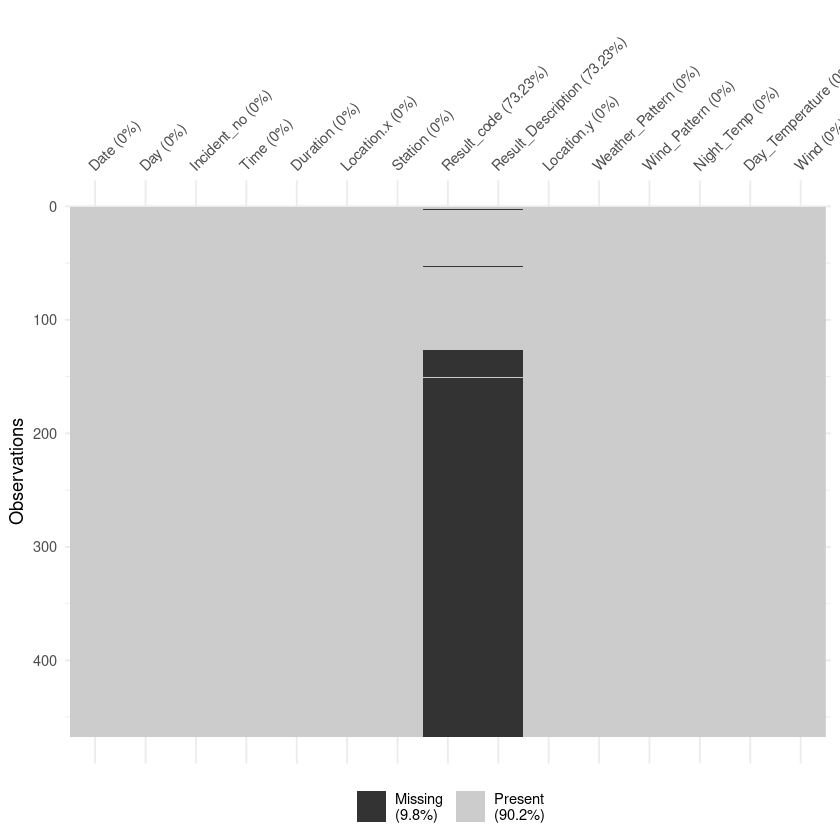

In [ ]:
#Checking the missing values
check <- akl_fire %>%vis_miss()
check

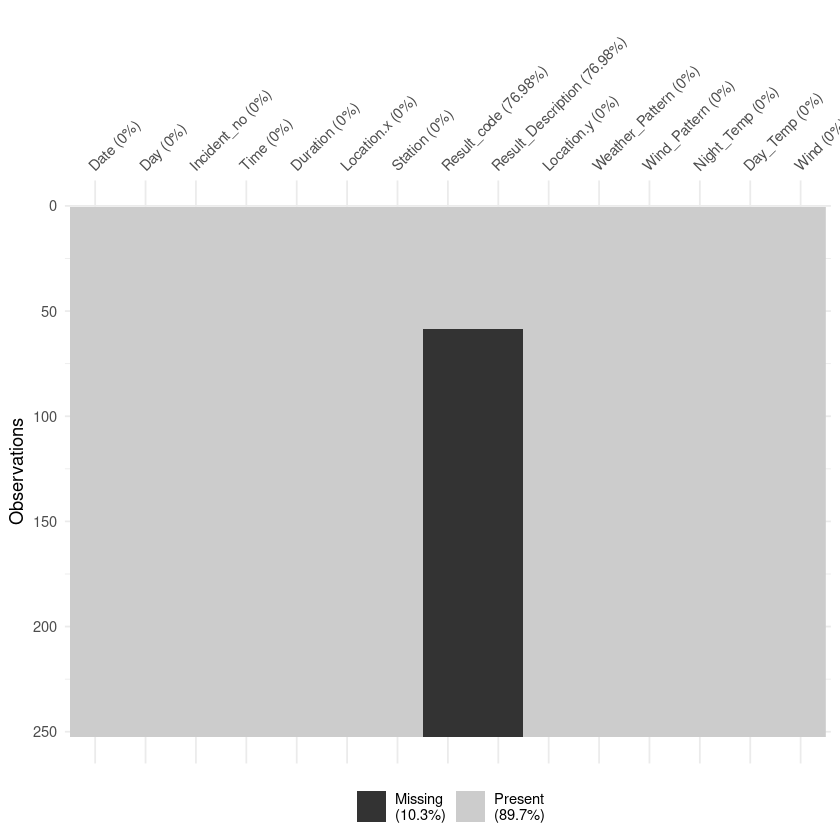

In [ ]:
#Checking the missing values
check <- welly_fire %>%vis_miss()
check